In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
path = '/Applications/Astrophysics_Research/output/'
galaxies = ["NGC2366","DDO168", "DDO126", "IC1613"]

def file(galaxy):
    
    file_a = path+galaxy+"_A/ringlog2.txt"
    file_r = path+galaxy+"_R/ringlog2.txt"
    file_b = path+galaxy+"_B/ringlog2.txt"
    
    return file_a, file_r, file_b

ngc_file = file("NGC2366")
ddo168_file = file("DDO168")
ddo126_file = file("DDO126")
ic1613_file = path+"IC1613_B/ringlog2.txt"

# Approaching velocities & dispersions
va1, disp_a1 = np.loadtxt(ngc_file[0], unpack = True, usecols = (2,3))

va2, disp_a2 = np.loadtxt(ddo168_file[0], unpack = True, usecols = (2,3))

va3, disp_a3 = np.loadtxt(ddo126_file[0], unpack = True, usecols = (2,3))

# Receding velocities & dispersions
vr1, disp_r1 = np.loadtxt(ngc_file[1], unpack = True, usecols = (2,3))

vr2, disp_r2 = np.loadtxt(ddo168_file[1], unpack = True, usecols = (2,3))

vr3, disp_r3 = np.loadtxt(ddo126_file[1], unpack = True, usecols = (2,3))

In [3]:
def err(va,vr,disp_a,disp_r):

    diff = va - vr

    disp_tot = np.append(disp_a,disp_r)
    disp = np.mean(disp_tot)

    err_tot = np.sqrt(disp**2 + diff**2)
    
    return err_tot

err_ngc = err(va1,vr1,disp_a1,disp_r1)

err_ddo168 = err(va2,vr2,disp_a2,disp_r2)

err_ddo126 = err(va3,vr3,disp_a3,disp_r3)

def avg_rot(va,vr):
    v_avg = []
    for i in range(len(va)):
        v = (va[i] + vr[i])/2
        v_avg.append(v)
    return v_avg
    

Text(0.5, 0.98, 'NGC2366')

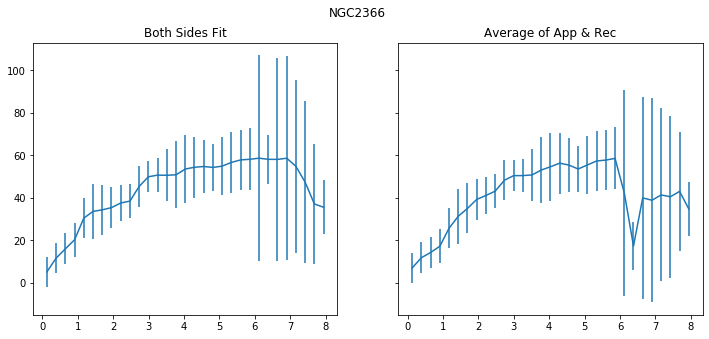

In [10]:
# Rotation curve for both sides fitted
r_ngc, v_ngc = np.loadtxt(ngc_file[2], unpack = True, usecols = (0,2))
v_avg_ngc = avg_rot(va1,vr1)

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,5),sharey = True)

ax1.errorbar(r_ngc,v_ngc, xerr = 0, yerr = [i for i in err_ngc])
ax2.errorbar(r_ngc, v_avg_ngc, xerr = 0, yerr = [i for i in err_ngc])

ax1.set_title("Both Sides Fit")
ax2.set_title("Average of App & Rec")
fig.suptitle("NGC2366")

Text(0.5, 0.98, 'DDO168')

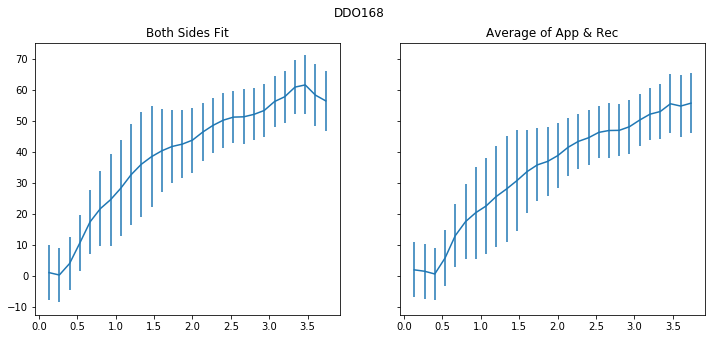

In [11]:
# Rotation curve for both sides fitted
r_ddo168, v_ddo168 = np.loadtxt(ddo168_file[2], unpack = True, usecols = (0,2))
v_avg_ddo168 = avg_rot(va2,vr2)

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,5),sharey = True)
ax1.errorbar(r_ddo168,v_ddo168, xerr = 0, yerr = [i for i in err_ddo168])
ax2.errorbar(r_ddo168, v_avg_ddo168, xerr = 0, yerr = [i for i in err_ddo168])

ax1.set_title("Both Sides Fit")
ax2.set_title("Average of App & Rec")
fig.suptitle("DDO168")

Text(0.5, 0.98, 'DDO126')

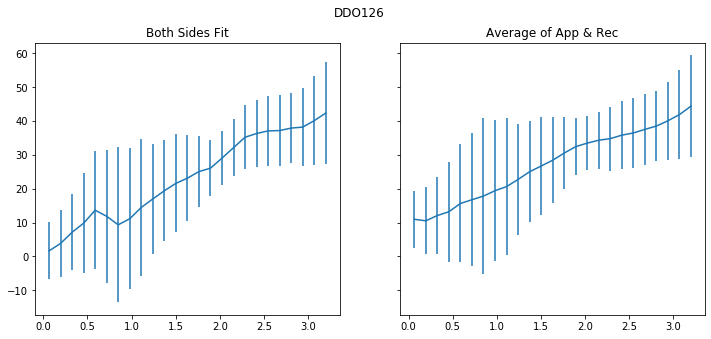

In [12]:
# Rotation curve for both sides fitted
r_ddo126, v_ddo126 = np.loadtxt(ddo126_file[2], unpack = True, usecols = (0,2))
v_avg_ddo126 = avg_rot(va3,vr3)

fig,(ax1,ax2) = plt.subplots(1,2, figsize = (12,5),sharey = True)
ax1.errorbar(r_ddo126,v_ddo126, xerr = 0, yerr = [i for i in err_ddo126])
ax2.errorbar(r_ddo126, v_avg_ddo126, xerr = 0, yerr = [i for i in err_ddo126])

ax1.set_title("Both Sides Fit")
ax2.set_title("Average of App & Rec")
fig.suptitle("DDO126")

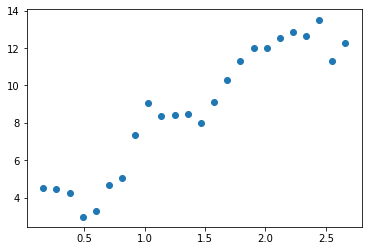

In [16]:
r_ic, v_ic = np.loadtxt(ic1613_file, unpack = True, usecols = (0,2))

plt.scatter(r_ic, v_ic)